# <center> Evaluation TP - Analyse Numérique <center>

<strong>FORSON</strong> Kaya

28 Novembre 2023

L3 GMP - Groupe 2


### Exercice 1: Modèle de Verhulst

\begin{equation*}
\begin{cases}
y'(t) = (a-by(t))y(t), \ a, b > 0\\
y(t_0) = y_0 > 0
\end{cases}
\end{equation*}

1. L'unique solution théorique exacte $y(t)$

$y(t) = (a/b) / 1 - D * e^{(- at)}$, avec D un constante


2. Calcul Analytique avec la méthode d'Euler Explicite

y<sub>n+1</sub> = y<sub>n</sub> + h * (a / b) / 1 - D * e <sup>at</sup> 

Nous avons les informations suivantes:

$a = b = 0,5$

$N = 5$

$h = (T - t_0) / N $
<br> $= 20 / 5$ 
<br>$= 4$

Calculons les solutions analytiquement:

$y_0 = 0,01 $ (donnée en TP)
<br>$y_1 = y_0 + h * (a - b * y_0)) * y_0 = 0.01 + 4 * (0.5 - 0.5 * 0.01)) * 0.01 = 0.0298$
<br>$y_2 = y_1 + h * (a - b * y_1)) * y_1 = 0.0298 + 4 * (0.5 - 0.5 * 0.0298)) * 0.0298 = 0.08762392$
<br>$y_3 = y_2 + h * (a - b * y_2)) * y_2 = 0.08762392 + 4 * (0.5 - 0.5 * 0.08762392)) * 0.08762392 = 0.2475158573$
<br>$y_4 = y_3 + h * (a - b * y_3)) * y_3 = 0.2475158573 + 4 * (0.5 - 0.5 * 0.2475158573)) * 0.2475158573 = 0.6200193727$
<br>$y_5 = y_4 + h * (a - b * y_4)) * y_4 = 0.6200193727 + 4 * (0.5 - 0.5 * 0.6200193727)) * 0.6200193727 = 1.091210073$

$[u_0,u_1,u_2,u_3,u_4,u_5]=[0.01, 0.0298, 0.08762392, 0.2475158573, 0.6200193727, 1.091210073]$

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint

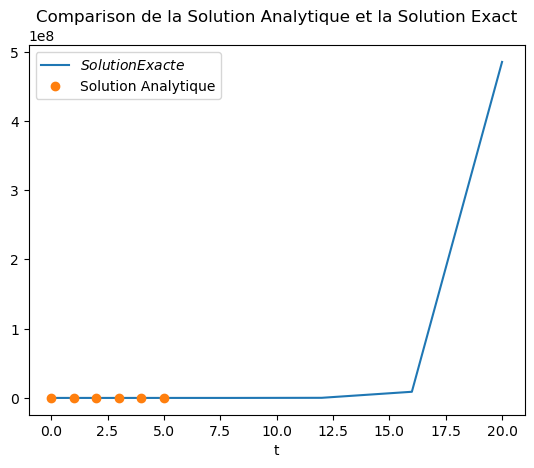

In [49]:
t0 = 0  # Valeur Initial de l'intervalle
T = 20   # Valeur Final de l'intervalle
N = 5  # Nombre de Noeuds
#Il aurait fallu augmenter le nombre de noeuds pour avoir une meilleur précision
a = 0.5   # a = 0.5   # Valeur Constant donnée 
b = 0.5   # Valeur Constant donnée par l'équation y'(t) = (a - b * y(t)) * y(t)
b = 0.5   # Valeur Constant donnée par l'équation y'(t) = (a - b * y(t)) * y(t)

#Valeurs de t0 à T avec N+1 points
t_values = np.linspace(t0, T, N + 1)

# Inicialiser la list pour garder les valeurs de y, d'abord avec la condition initial y(0) = 0.01
y_values = [0.01]

# Largeur des Intervalles
h = (T - t0) / N

for i in range(N):
    # Formule de la méthod d'Euler: y_{n+1} = y_n + h * f(t_n, y_n), où f(t, y) = (a - b * y(t)) * y(t)
    y_next = y_values[-1] + h * (a - b * y_values[-1]) * y_values[-1]  # Calculer la prochaine valeur de y
    y_values.append(y_next)  # Ajouter la valeur de y au list

# Vecteur des Résultats obtenu précédament:
[u0, u1, u2, u3, u4, u5] = [0.01, 0.0298, 0.08762392, 0.2475158573, 0.6200193727, 1.091210073]

#Graphe

# Paramètres du Graphe
plt.plot(t_values, np.exp(t_values), label="$Solution Exacte$")  # Solution Exacte
plt.plot([t0, t0 + 1, t0 + 2, t0 + 3, t0 + 4, t0 + 5], [u0, u1, u2, u3, u4, u5], 'o', label="Solution Analytique")  # Solution Analytique
plt.xlabel("t")  
plt.legend()  # Legende
plt.title("Comparison de la Solution Analytique et la Solution Exact") 
plt.show()  

3. Nous allons programmer la fonction associée à la résolution d un problème de Cauchy avec la méthode d Euler explicite. 

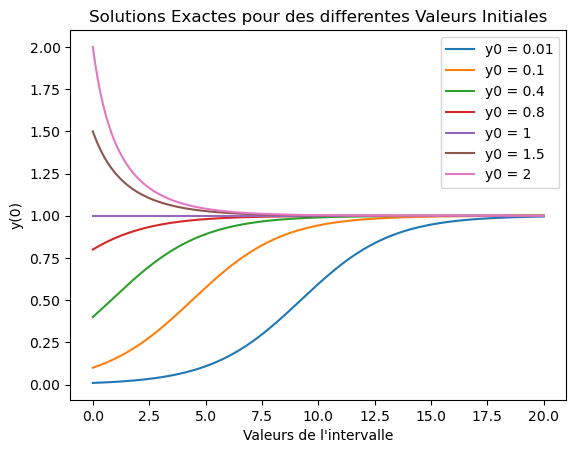

In [66]:
t0 = 0  # Valeur Initial de l'intervalle
T = 20   # Valeur Final de l'intervalle
N = 1000  # N° neouds - j'ai mis une plus grand nombre de neouds pour améliorer la précision
a = 0.5   # Valeur Constant donnée 
b = 0.5   # Valeur Constant donnée 

# Vecteur des Résultats obtenu précédament:
initial_values = [0.01, 0.1, 0.4, 0.8, 1, 1.5, 2]

#Valeurs de t0 à T avec N+1 points
t_values = np.linspace(t0, T, N + 1)

# Largeur des Intervalles
h = (T - t0) / N


for y0 in initial_values:
    # Initializer notre liste pour garder les valeurs de y avec la con to store y values with the current initial condition y(0) = y0
    y_values = [y0]

    # Méthode d'Euler pour résoudre numériquement l'équation
    for i in range(N):
        # Formule de la méthode d'Euler
        y_next = y_values[-1] + h * (a - b * y_values[-1]) * y_values[-1]
        y_values.append(y_next)

#Graphe  

    plt.plot(t_values, y_values, label=f"y0 = {y0}")

# Paramètres du Graphe
plt.xlabel("Valeurs de l'intervalle")
plt.ylabel("y(0)")  
plt.legend() 
plt.title("Solutions Exactes pour des differentes Valeurs Initiales")  
plt.show()  

4. La méthode d'Euler Explicite avec N = 50

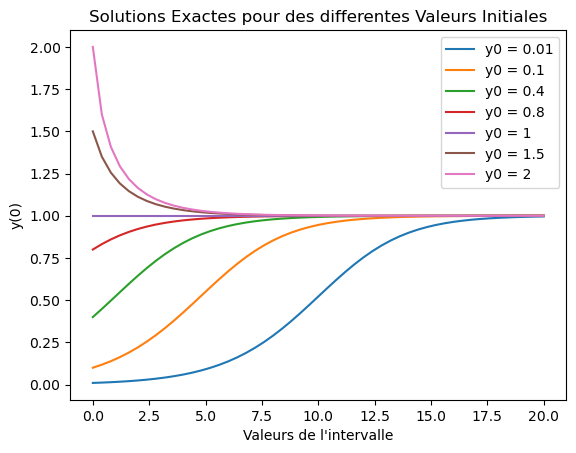

In [67]:
t0 = 0  # Valeur Initial de l'intervalle
T = 20   # Valeur Final de l'intervalle
N = 50  # Demandé dans l'énoncé
a = 0.5   # Valeur Constant donnée 
b = 0.5   # Valeur Constant donnée 

# Vecteur des Résultats obtenu précédament:
initial_values = [0.01, 0.1, 0.4, 0.8, 1, 1.5, 2]

#Valeurs de t0 à T avec N+1 points
t_values = np.linspace(t0, T, N + 1)

# Largeur des Intervalles
h = (T - t0) / N


for y0 in initial_values:
    # Initializer notre liste pour garder les valeurs de y avec la con to store y values with the current initial condition y(0) = y0
    y_values = [y0]

    # Méthode d'Euler pour résoudre numériquement l'équation
    for i in range(N):
        # Formule de la méthode d'Euler
        y_next = y_values[-1] + h * (a - b * y_values[-1]) * y_values[-1]
        y_values.append(y_next)

#Graphe  

    plt.plot(t_values, y_values, label=f"y0 = {y0}")

# Paramètres du Graphe
plt.xlabel("Valeurs de l'intervalle")
plt.ylabel("y(0)")  
plt.legend() 
plt.title("Solutions Exactes pour des differentes Valeurs Initiales")  
plt.show()  

5. La méthode d'Euler Explicite avec N = 100

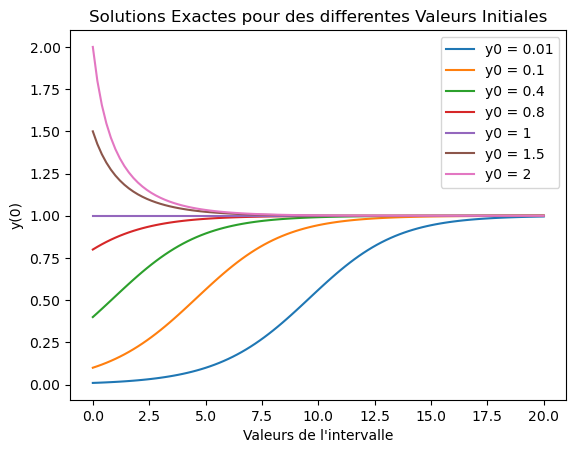

In [68]:
t0 = 0  # Valeur Initial de l'intervalle
T = 20   # Valeur Final de l'intervalle
N = 100  # Demandé dans l'éononcé
a = 0.5   # Valeur Constant donnée 
b = 0.5   # Valeur Constant donnée 

# Vecteur des Résultats obtenu précédament:
initial_values = [0.01, 0.1, 0.4, 0.8, 1, 1.5, 2]

#Valeurs de t0 à T avec N+1 points
t_values = np.linspace(t0, T, N + 1)

# Largeur des Intervalles
h = (T - t0) / N


for y0 in initial_values:
    # Initializer notre liste pour garder les valeurs de y avec la con to store y values with the current initial condition y(0) = y0
    y_values = [y0]

    # Méthode d'Euler pour résoudre numériquement l'équation
    for i in range(N):
        # Formule de la méthode d'Euler
        y_next = y_values[-1] + h * (a - b * y_values[-1]) * y_values[-1]
        y_values.append(y_next)

#Graphe  

    plt.plot(t_values, y_values, label=f"y0 = {y0}")

# Paramètres du Graphe
plt.xlabel("Valeurs de l'intervalle")
plt.ylabel("y(0)")  
plt.legend() 
plt.title("Solutions Exactes pour des differentes Valeurs Initiales")  
plt.show()  

6. $\epsilon_i = |u_{N_i}(t=2)-y(2)|$ - Je n'ai pas pu faire cette question

### Exercice 2: Modèle de réservoir

Nous partons de cette formule:
    
$V=\pi h^2(\frac{3R-h}{3})$

On cherche à déterminer la hauteur h du liquide au sein du réservoir de rayon $R=5m$

Léquivalentede la formule précédente revient à écrire: $h^3-3Rh^2+\frac{3V}{\pi}=0$

Avec cette fonction: $f(h)= h^3-3Rh^2+\frac{3V}{\pi}$ nous allons évaluer la hauteru h du liqude dans le réservoir en fonction du volume.

Nous allons utilisé la <strong>Méthode de Newton</strong> est une méthode utilisé pour résoudre les équations linéaire ou non-linéaire.


For V = 100, Numerical Solution using Newton Method: (2.797435886994389, 9.33862320806611e-10, 5)
For V = 200, Numerical Solution using Newton Method: (14.029703688900378, 1.7443770872205278e-09, 4)
For V = 300, Numerical Solution using Newton Method: (13.40597163870225, 1.865174681370263e-13, 7)
For V = 400, Numerical Solution using Newton Method: (12.590333813194928, 8.250662375530737e-10, 8)
For V = 500, Numerical Solution using Newton Method: (11.180155096326493, 1.0448708565036213e-10, 10)


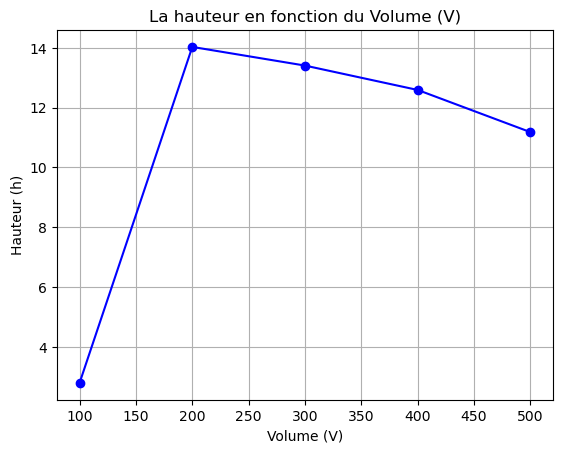

In [27]:
# Valeurs Données
R = 5  # Rayon
V_values = [100, 200, 300, 400, 500]  # List des valeurs du Volume
E = 0.000001  # Tolérance

# Fonction f(h) = h^3 - 3Rh^2 + 3V/pi (donnée)
def f(h, R, V):
    return h**3 - 3 * R * h**2 + 3 * V / np.pi

# Dérivé de la fonction f(h)
def f_prime(h, R):
    return 3 * h**2 - 6 * R * h

#Utilisons la méthode de Newton
def newton(f, fprime, i, E, V):
    
    delta = 1 # Delta est une valeur quelconque qui sert a initialiser. Delta >> E
    k = 0 #k = n° iterations
    
    while delta > E:
        x = i - f(i, R, V) / fprime(i, R) #Formule de la méthode de Newton
        delta = abs(x - i)
        i = x
        k += 1 #Augmente à chaque fois les itérations
    return x, delta, k-1

# Valeurs numériques
for V in V_values:
    solution = newton(f, f_prime, 0.5, E, V)
    print(f"For V = {V}, Numerical Solution using Newton Method:", solution)


#Graphe
    
# Calculate h for different V values
h_values = []
for V in V_values:
    solution, _, _ = newton(f, f_prime, 0.5, E, V)
    h_values.append(solution)

# Plotting h as a function of Volume (V)
plt.plot(V_values, h_values, marker='o', linestyle='-', color='b')
plt.title("La hauteur en fonction du Volume (V)")
plt.xlabel("Volume (V)")
plt.ylabel("Hauteur (h)")
plt.grid(True)
plt.show()